Les Pima sont un groupe d'Amérindiens vivant en Arizona. Une prédisposition génétique a permis à ce groupe de survivre normalement à un régime pauvre en glucides pendant des années. Au cours des dernières années, en raison d'un passage soudain des cultures agricoles traditionnelles aux aliments transformés, ainsi que d'un déclin de l'activité physique, ils ont développé la prévalence la plus élevée de diabète de type 2 et pour cette raison ils ont fait l'objet de nombreuses études.



L'ensemble de données comprend des données provenant de 768 femmes présentant 8 caractéristiques, en particulier :

* Nombre de grossesses
* Concentration de glucose plasmatique a 2 heures dans un test de tolérance au glucose par voie orale
* Tension artérielle diastolique (mm Hg)
* Epaisseur du pli cutané du triceps (mm)
* 2 heures d'insuline sérique (mu U/ml)
* Indice de masse corporelle (poids en kg/(taille en m)^2)
* Le diabète pedigree fonction
* Âge (années)
La dernière colonne de l'ensemble de données indique si la personne a reçu un diagnostic de diabète (1) ou non (0).



L'objectif est de déterminer quelles sont les caractéristiques (features) pour identifier les personnes qui ont un diabète de type 2

Récupérer le fichier pima-indians-diabetes.csv et le mettre dans un dataframe. Attention les premières lignes correspondent à la description des données. Il est possible de ne pas les lire en mettant skiprows=9 dans la fonction read_csv.

## **Installation**



Avant de commencer, il est nécessaire de déjà posséder dans son environnement toutes les librairies utiles. Dans la seconde cellule nous importons toutes les librairies qui seront utiles à ce notebook. Il se peut que, lorsque vous lanciez l'éxecution de cette cellule, une soit absente. Dans ce cas il est nécessaire de l'installer. Pour cela dans la cellule suivante utiliser la commande :  

*! pip install nom_librairie*  

**Attention :** il est fortement conseillé lorsque l'une des librairies doit être installer de relancer le kernel de votre notebook.

**Remarque :** même si toutes les librairies sont importées dès le début, les librairies utiles pour des fonctions présentées au cours de ce notebook sont ré-importées de manière à indiquer d'où elles viennent et ainsi faciliter la réutilisation de la fonction dans un autre projet.

In [13]:
# utiliser cette cellule pour installer les librairies manquantes
# pour cela il suffit de taper dans cette cellule : !pip install nom_librairie_manquante
# d'exécuter la cellule et de relancer la cellule suivante pour voir si tout se passe bien
# recommencer tant que toutes les librairies ne sont pas installées ...


#!pip install ..

# ne pas oublier de relancer le kernel du notebook

In [14]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np 
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

#Sickit learn met régulièrement à jour des versions et indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Pour pouvoir lire et sauvegarder sur votre répertoire Google Drive, il est nécessaire de fournir une autorisation. Pour cela il suffit d'éxecuter la ligne suivante et de saisir le code donné par Google.

In [15]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Corriger éventuellement la ligne ci-dessous pour mettre le chemin vers un répertoire spécifique dans votre répertoire google drive : 

In [16]:
my_local_drive='/content/gdrive/My Drive/Colab Notebooks/ML_FDS'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

/content/gdrive/My Drive/Colab Notebooks/ML_FDS


'/content/gdrive/My Drive/Colab Notebooks/ML_FDS'

## **Travaux pratiques**

In [17]:
import pandas as pd
import numpy as np
names=[
    "NumTimesPrg", "PlGlcConc", "BloodP",
    "SkinThick", "TwoHourSerIns", "BMI",
    "DiPedFunc", "Age", "HasDiabetes"]
#il faut sauter les 9 premières lignes qui sont le descriptif des variables, skiprows
df = pd.read_csv('pima-indians-diabetes.csv',names=names,skiprows=9)


Afficher le nombre de ligne et de colonnes du dataframe ainsi que les 5 premières lignes

In [18]:
print (df.shape)
display(df.head())

(768, 9)


,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Afficher la matrice de corrélation. Rappel il faut utiliser la fonction corr().

In [19]:
corr = df.corr()
display(corr)

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Afficher, à l'aide de seaborn, la matrice de correlation

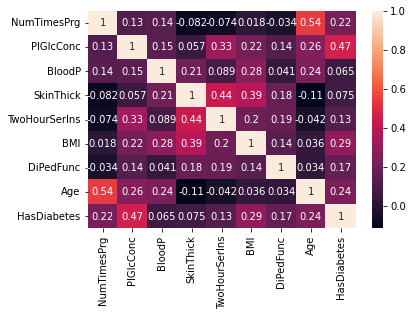

In [20]:
%matplotlib inline
import seaborn as sns
sns.heatmap(corr, annot = True)

Il est important d'analyser les histogrammes de chaque variable pour mieux comprendre comment les données sont réparties.  
A l'aide du code suivant, afficher les différents histogrammes.  
import matplotlib.pyplot as plt  
df.hist(bins=50, figsize=(20, 15))  
plt.show()  

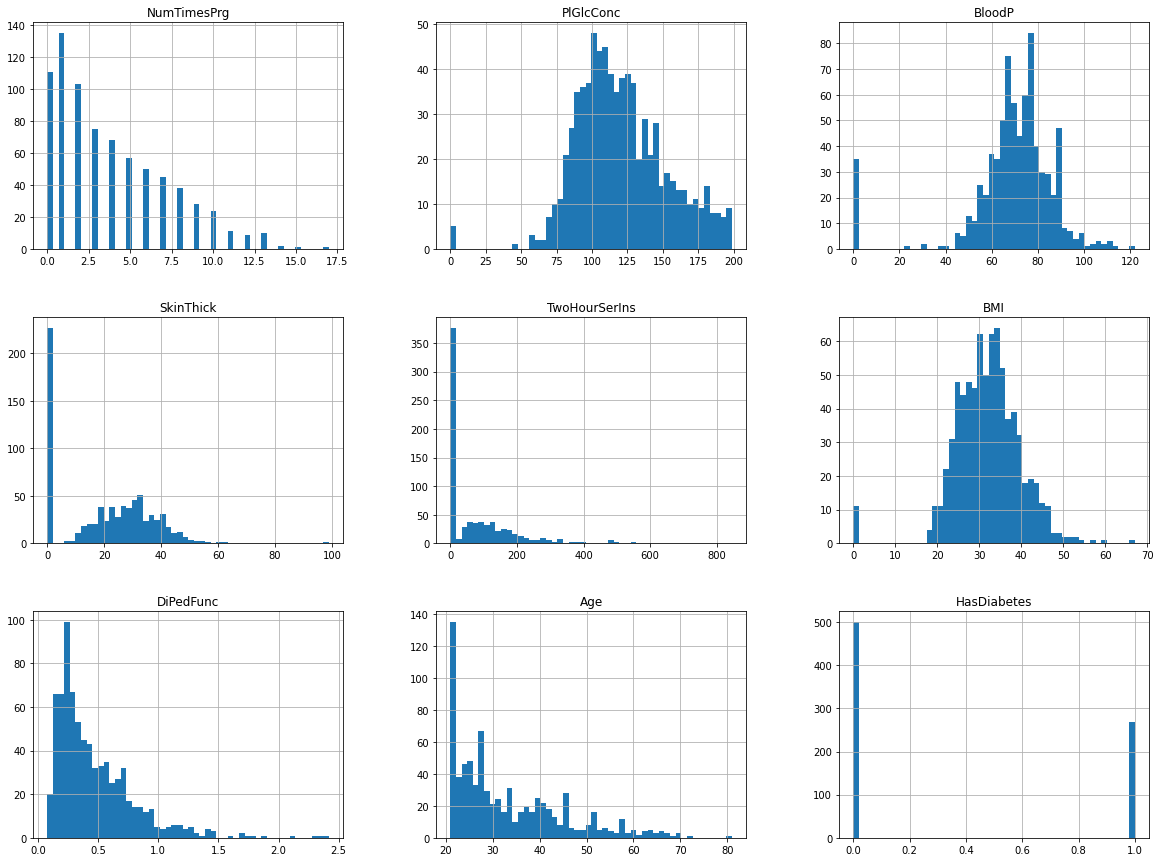

In [21]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.show()

Existe-t'il des valeurs nulles ? Existe-til des valeurs manquantes ? Rappel vous pouvez le voir avec des histogrammes mais aussi avec une heatmap.  

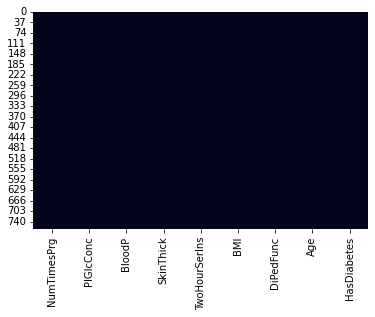

In [22]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

En fait on peut constater qu'il n'y a pas de valeurs manquantes avec le heatmap mais par contre il y a des valeurs nulles. Il faut toujours faire attention à la manière dont sont codées les valeurs manquantes. Ici nous voyons dans les histogrammes que pour BMI, BloodP, PlGlcConc, SkinThick, TwoHourSerIns il existe des valeurs manquantes. Le nombre de grossesses n'est pas considéré comme une valeur manquante bien sûr.  

Transformer les valeurs nulles par la médiane de la série. 

In [23]:
# valeur médiane
median_bmi = df['BMI'].median()
# remplacement par la médiane
df['BMI'] = df['BMI'].replace(
    to_replace=0, value=median_bmi)

# valeur médiane
median_bloodP = df['BloodP'].median()
# remplacement par la médiane
df['BloodP'] = df['BloodP'].replace(
    to_replace=0, value=median_bloodP)

# valeur médiane
median_PlGlcConc = df['PlGlcConc'].median()
# remplacement par la médiane
df['PlGlcConc'] = df['PlGlcConc'].replace(
    to_replace=0, value=median_PlGlcConc)

# valeur médiane
median_SkinThick = df['SkinThick'].median()
# remplacement par la médiane
df['SkinThick'] = df['SkinThick'].replace(
    to_replace=0, value=median_SkinThick)

# valeur médiane
median_TwoHourSerIns = df['TwoHourSerIns'].median()
# remplacement par la médiane
df['TwoHourSerIns'] = df['TwoHourSerIns'].replace(
    to_replace=0, value=median_TwoHourSerIns)


Les données sont, à présent, transformées et nous allons pouvoir créer un jeu de données de test et d'apprentissage. Faire une copie du dataframe en df2. Sur df appliquer un scaling pour normaliser les valeurs par rapport à la moyenne et l'écart type (utilisation de StandardScaler (). Nous conservons la copie df2 sans transformation.   
L'objectif à présent est d'appliquer différents classifieurs pour voir celui qui est le plus performant. Pour le ou les meilleurs rechercher les hyperparamètres et créer un pipeline à sauvegarder. Il faut ensuite pouvoir traiter de nouvelles données pour prédire si il y a diabète ou pas.  

Tester les résultats sur df et sur df2. 

In [24]:
# pour essayer sans scaling
df2=df.copy()

#traitement de df 
# séparation données à prédire
array = df.values
X = array[:,0:8]
y = array[:,8]


#utilisation de StandardScaler


standardscaler = StandardScaler()
X = standardscaler.fit_transform(X)
print ("Pour vérifier que les données ont bien été transformées")
print (pd.DataFrame(X).head())


#création d'un jeu de test et d'apprentissage (70,30)
from sklearn.model_selection import train_test_split 

validation_size=0.3 #30% du jeu de données pour le test

testsize= 1-validation_size
seed=30
X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)

Pour vérifier que les données ont bien été transformées
          0         1         2  ...         5         6         7
0  0.639947  0.866045 -0.031990  ...  0.167240  0.468492  1.425995
1 -0.844885 -1.205066 -0.528319  ... -0.851551 -0.365061 -0.190672
2  1.233880  2.016662 -0.693761  ... -1.331838  0.604397 -0.105584
3 -0.844885 -1.073567 -0.528319  ... -0.633239 -0.920763 -1.041549
4 -1.141852  0.504422 -2.679076  ...  1.549885  5.484909 -0.020496

[5 rows x 8 columns]


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

#traitement de df 
# séparation données à prédire
array = df.values
X = array[:,0:8]
y = array[:,8]


#utilisation de StandardScaler
standardscaler = StandardScaler()
X = standardscaler.fit_transform(X)
print ("Pour vérifier que les données ont bien été transformées")
print (pd.DataFrame(X).head())


#création d'un jeu de test et d'apprentissage (70,30)


validation_size=0.2 #30% du jeu de données pour le test

testsize= 1-validation_size
seed=20
X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)

Pour vérifier que les données ont bien été transformées
          0         1         2  ...         5         6         7
0  0.639947  0.866045 -0.031990  ...  0.167240  0.468492  1.425995
1 -0.844885 -1.205066 -0.528319  ... -0.851551 -0.365061 -0.190672
2  1.233880  2.016662 -0.693761  ... -1.331838  0.604397 -0.105584
3 -0.844885 -1.073567 -0.528319  ... -0.633239 -0.920763 -1.041549
4 -1.141852  0.504422 -2.679076  ...  1.549885  5.484909 -0.020496

[5 rows x 8 columns]


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection

In [27]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
models.append(('LSVC', LinearSVC(max_iter=3000)))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTR', DecisionTreeRegressor()))

In [28]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import time
seed = 7
results = []
names = []
scoring='accuracy'
for name,model in models:
    kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
    start_time = time.time()
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    print ("Time pour",name," ",time.time() - start_time)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 


Time pour LR   0.06025958061218262
LR: 0.765687 (0.048046)
Time pour KNN   0.06861019134521484
KNN: 0.731835 (0.055523)
Time pour NB   0.026978492736816406
NB: 0.748770 (0.033949)
Time pour SVC   0.23436641693115234
SVC: 0.763004 (0.064193)
Time pour LSVC   0.6180167198181152
LSVC: 0.763055 (0.041236)
Time pour RFC   2.130427598953247
RFC: 0.756494 (0.040858)
Time pour DTR   0.03887534141540527
DTR: 0.678452 (0.041406)


[Text(0, 0, 'LR'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'SVC'),
 Text(0, 0, 'LSVC'),
 Text(0, 0, 'RFC'),
 Text(0, 0, 'DTR')]

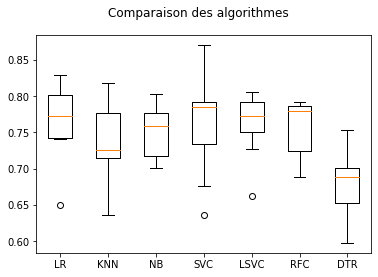

In [29]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

Les meilleurs algorithmes sont LR et SVC. Nous pouvons rechercher les hyperparamètres pour ces deux algorithmes.

In [30]:
from sklearn.model_selection import GridSearchCV

grid_param = {  
    'C' : [0.001,0.01,0.1,1,10,100]
}


gd_sr = GridSearchCV(estimator=LogisticRegression(),  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1,
                    return_train_score=True)

gd_sr.fit(X_train, y_train)  

print ('meilleur score ',gd_sr.best_score_,'\n')
print ('meilleurs paramètres', gd_sr.best_params_,'\n')
print ('meilleur estimateur',gd_sr.best_estimator_,'\n')

meilleur score  0.7709677419354839 

meilleurs paramètres {'C': 1} 

meilleur estimateur LogisticRegression(C=1) 



In [31]:
grid_param = {
    'C': [0.001, 0.01, 0.1, 1, 10], 
    'gamma' : [0.001, 0.01, 0.1, 1], 
    'kernel': ['linear','rbf']}

gd_sr = GridSearchCV(estimator=SVC(),  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=1,
                    return_train_score=True)

gd_sr.fit(X_train, y_train)  

print ('meilleur score ',gd_sr.best_score_,'\n')
print ('meilleurs paramètres', gd_sr.best_params_,'\n')
print ('meilleur estimateur',gd_sr.best_estimator_,'\n')

meilleur score  0.7843010752688173 

meilleurs paramètres {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} 

meilleur estimateur SVC(C=1, gamma=0.1) 



SVC s'avère obtenir de meilleurs résultats. Nous l'utilisons pour faire de la prédiction sur les données test.

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Creation d'une instance de l'algorithme en utilisant les meilleurs paramètres
svc = gd_sr.best_estimator_

validation_size=0.2 #20% du jeu de données pour le test

testsize= 1-validation_size
seed=20
X_train,X_test,y_train,y_test=train_test_split(X, y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)


svc.fit(X_train, y_train)
result = svc.predict(X_test)
print('\n accuracy: ', accuracy_score(result, y_test),'\n')

conf = confusion_matrix(y_test, result)
print ('\n matrice de confusion \n',conf)
print ('\n',classification_report(y_test, result))


 accuracy:  0.6764227642276422 


 matrice de confusion 
 [[375  14]
 [185  41]]

               precision    recall  f1-score   support

         0.0       0.67      0.96      0.79       389
         1.0       0.75      0.18      0.29       226

    accuracy                           0.68       615
   macro avg       0.71      0.57      0.54       615
weighted avg       0.70      0.68      0.61       615



Création d'un pipeline complet pour sauvegarder le modèle et le tester sur de nouvelles données. 

In [33]:
from sklearn.pipeline import Pipeline

names=[
    "NumTimesPrg", "PlGlcConc", "BloodP",
    "SkinThick", "TwoHourSerIns", "BMI",
    "DiPedFunc", "Age", "HasDiabetes"]
#il faut sauter les 9 premières lignes qui sont le descriptif des variables, skiprows
df = pd.read_csv('pima-indians-diabetes.csv',names=names,skiprows=9)

array = df.values
X = array[:,0:8]
y = array[:,8]


print ('Création du pipeline \n')
pipeline = Pipeline([('scl', StandardScaler()),
                    ('clf', svc)])

validation_size=0.3 #30% du jeu de données pour le test

testsize= 1-validation_size
seed=30
X_train,X_test,y_train,y_test=train_test_split(X, y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)


pipeline.fit(X_train, y_train)
result = pipeline.predict(X_test)

print('\n accuracy:',accuracy_score(result, y_test),'\n')

import pickle
filename = 'modelsvcpima.pkl'
pickle.dump(pipeline, open(filename, 'wb'))

Création du pipeline 


 accuracy: 0.7843866171003717 



In [34]:
print ("Chargement du modèle \n")
filename = 'modelsvcpima.pkl'
clf_loaded = pickle.load(open(filename, 'rb'))

#Considérons deux nouvelles données qui ne sont pas standardisées
new_df = pd.DataFrame([[6, 168, 72, 35, 0, 43.6, 0.627, 65],
                      [2,85,67,30,2,27.6,0.351,22]], dtype='float')
print ("La première ligne correspond à une personne qui a tendance à avoir du diabète de type 2", 
       "la prédiction devrait être de 1. Pour la seconde elle devrait être de 0",
      "il faut remarquer que les données ne sont pas standardisées à l'entrée et que lors",
      "de la prédiction une étape de standardisation à lieu grâce au pipeline")
prediction = clf_loaded.predict(new_df)
print(prediction)


Chargement du modèle 

La première ligne correspond à une personne qui a tendance à avoir du diabète de type 2 la prédiction devrait être de 1. Pour la seconde elle devrait être de 0 il faut remarquer que les données ne sont pas standardisées à l'entrée et que lors de la prédiction une étape de standardisation à lieu grâce au pipeline
[1. 0.]


Essai de df2 sans standardisation.  

Nous avons vu que SVC avait de meilleurs résultats aussi nous l'utilisons ici pour voir l'intérêt de la standardisation.

In [35]:
array = df2.values
X = array[:,0:8]
y = array[:,8]

svc = gd_sr.best_estimator_

validation_size=0.2 #20% du jeu de données pour le test

testsize= 1-validation_size
seed=20
X_train,X_test,y_train,y_test=train_test_split(X, y, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)


svc.fit(X_train, y_train)
result = svc.predict(X_test)
print('\n accuracy: ', accuracy_score(result, y_test),'\n')

conf = confusion_matrix(y_test, result)
print ('\n matrice de confusion \n',conf)
print ('\n',classification_report(y_test, result))


 accuracy:  0.6325203252032521 


 matrice de confusion 
 [[389   0]
 [226   0]]

               precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       389
         1.0       0.00      0.00      0.00       226

    accuracy                           0.63       615
   macro avg       0.32      0.50      0.39       615
weighted avg       0.40      0.63      0.49       615



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Comme attendu, étant donné qu'il y a des données à des échelles très différentes l'accuracy diminue lorsque les données ne sont pas transformées.